# Exploratory Data Analysis of Laptop Reviews



## Introduction
The Purpose  serves as an Exploratory Data Analysis of  a Dataset of Laptop Reviews, which contains 24,000 rows of laptop product reviews which  were scraped from Flipkart.  These reviews cover 600 various laptop models.  

Data was acquired from https://www.kaggle.com/datasets/gitadityamaddali/flipkart-laptop-reviews

## Objective
+ To  provide an outline of different laptop models and reviews for that model from Flipkart.
+ Will indicate the factors of good or bad reviews for a particular model.


# Implementation of Packages

### Packages that will be used:
+ __Pandas__  will be the first package to be included , since it  efficient with data manipulation and analysis, which can work with Series or DataFrame.
+ __Numpy__ will be used mainly for numerical computing.  It creates efficient Arrays
+ __Matplotlib__ plotting library in python. The focus is going to be pyplot and mpatches.
    - __pyplot__ This is a plotting library for Python.   
    - __mpatches__  To create legends in the plots.  
+ __Wordcloud__ to represent the frequency of words in a body of text. The larger the size of word the more it is mentioned.
+ __re__ to work with regular expressions like a super-powered search tool for text, searches for patterns in strings, not just specific words
+ __seaborn__  based on Matplotlib but it creates artistic, beautiful and  informative visualisation. Of a higher level.


In [1]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib #to create plots - matplotlib is a plotting library for Python and its numerical extension NumPy
import matplotlib.pyplot as plt  #to create plots - matplotlib is a plotting library for Python and its numerical extension NumPy
import matplotlib.patches as mpatches # Import mpatches for creating legend patches
from wordcloud import WordCloud#to work with reviews variable, to extract data from it
import wordcloud
import re #to work with regular expressions
import seaborn as sns # to create plots - seaborn is a data visualization library based on matplotlib
print("Pandas version:", pd.__version__)
print("NumPy version:", np.__version__)         
print("Matplotlib version:", matplotlib.__version__)
print("WordCloud version:", wordcloud.__version__)
print("Re version:", re.__version__)
print("Seaborn version:", sns.__version__)

Pandas version: 2.2.2
NumPy version: 1.26.4
Matplotlib version: 3.9.2
WordCloud version: 1.9.4
Re version: 2.2.1
Seaborn version: 0.13.2


## Importing Data

#### _Saving as UTF-8_

The __laptops_dataset_final_600.csv__ was opened prior this import to check that the format is changed to :

+ _Unicode Transformation Format - 8 bits_. (__UTF-8__).  

This is done to eliminate any unknown characters,  which produces a noisy data set.
The _ASCII_ version used to contain only one byte of data, while _UTF-8_ can store up to 4 bytes of data which sum up to  approximately more than 1 million of different codes.

 ___Reading CSV file into DataFrame___

In [2]:
fileloc='archive/laptops_dataset_final_600.csv'
laptopsdf=pd.read_csv(fileloc, encoding='utf-8')
dflptops = pd.DataFrame(laptopsdf) # create a DataFrame from the CSV file

## Data Exploration ##

___Checking first five records___

This is done to check that the importation was done successfully.


In [3]:
dflptops.head()

,product_name,overall_rating,no_ratings,no_reviews,rating,title,review
0,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Perfect product!,"Loved it, it's my first MacBook that I earned ..."
1,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Fabulous!,Battery lasted longer than my first relationsh...
2,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Fabulous!,Such a great deal.. very happy with the perfor...
3,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,4,Delightful,"Awesome build quality and very good display, b..."
4,Apple MacBook AIR Apple M2 - (8 GB/256 GB SSD/...,4.7,"15,210",900,5,Awesome,When i ordered and came to know about seller r...


The above mirror what was stated in the website regarding the Dataset Features which should be:

+ __product_name__      – Name and specifications of the laptop.
+ __overall_rating__       – Average rating of the product.
+ __no_ratings__    – Total number of ratings received.
+ __no_reviews__     – Total number of reviews written.
+ __rating__  – Individual rating given by the user (out of 5).
+ __title__  – Short summary of the review.
+ __review__ – Full text of the customer’s review.

___Checking last  five records___

This is to confirm that the data is consistant just like the beginning of the DataFrame.  

In [4]:
dflptops.tail()

,product_name,overall_rating,no_ratings,no_reviews,rating,title,review
24108,MSI Modern 14 Intel Core i5 13th Gen 1335U - (...,4.3,156,24,5,Perfect product!,MSI Laptop is high performance and the best. c...
24109,MSI Modern 14 Intel Core i5 13th Gen 1335U - (...,4.3,156,24,5,Perfect product!,Excellent performance best laptop.
24110,MSI Modern 14 Intel Core i5 13th Gen 1335U - (...,4.3,156,24,4,"Good product, Lacks features.",Decent battery life. Exceptional build quality...
24111,Lenovo IdeaPad 5 2-in-1 WUXGA IPS AMD Ryzen 7 ...,4.4,7,2,3,Nice,The product does not support facial recognitio...
24112,Lenovo IdeaPad 5 2-in-1 WUXGA IPS AMD Ryzen 7 ...,4.4,7,2,4,Very Good,DISPLAY IS A LET DOWN. But the lenovo Pen work...


This shows that there is a consistency in the importing of data.  There are no major issues, the columns all have the same data structure.  They conform with what was stated on the website regarding the data that is found.

___Checking out for  information of the DataFrame___

_Checking size_

In [5]:
print(dflptops.shape)

(24113, 7)


This means that the data has 24113 rows of data with 7 distinct columns.   On Kaggle it states that the dataset contains 24,000 rows of laptop product reviews covering 600 laptop models.    It means that there are 113 extra rows of data in the dataset.  

This can result in either __empty rows__, or __duplicate rows__.  

Before attempting any modification let us consider to find more information about the data.

In [6]:
dflptops.describe()

,overall_rating,rating
count,24113.000000,24113.000000
mean,4.186273,4.214573
std,0.228392,1.184845
min,3.300000,1.000000
25%,4.100000,4.000000
50%,4.200000,5.000000
75%,4.300000,5.000000
max,5.000000,5.000000


Before  getting into detail about this dataset, what is of interest so far is the __count__ which shows consistency when the __overall_rating__ count is equal to __rating__.  

It still gives the result of  24113 which is exactly like the shape of the dataset.  

__Count__ shows only the number of non-empty cells for each column.  

To confirm this another code is going to be used.

In [7]:
dflptops.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24113 entries, 0 to 24112
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_name    24113 non-null  object 
 1   overall_rating  24113 non-null  float64
 2   no_ratings      24113 non-null  object 
 3   no_reviews      24113 non-null  object 
 4   rating          24113 non-null  int64  
 5   title           24113 non-null  object 
 6   review          24113 non-null  object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.3+ MB


___No empty Cells___

This confirms that there are __no__ empty cells, but apart from that it adds other information.

___Correct Information:___
+ __product_name__ is an object which is usually used for strings (text).
+  __overall_rating__  is considered of type float64.  Float is usally used for floating-point numbers or decimal numbers.  
+ __rating__ is set to integer as reflected in the first 5 and last 5 rows of data.
+ __title__ is set to object  since it is text.
+ __review__ is also set to object since it is also text.

___Incorrect Data Types which  need amendments___ 
+ __no_ratings__ is an object (text or string) which is incorrect since here the NUMBER of ratings is considered so this needs to be modified to integer.
+ __no_reviews__ is also considered as an object (string),  which is also incorrect since the data tackles the NUMBER of reviews so this needs to be considered as integer as well.



This leads to the conclusion that there are no empty rows as predicted before, but more of duplicate entries.

This needs to be taken care of, since the duplicates might end up skewing our data.

## Data Cleaning ##

### Duplicating the DataFrame ###

Before  any attempt  to do any changes to the dataset, the dataset will be duplicated, and further modifications will be done to the new dataset.

In [8]:
copylaptopsdf=dflptops.copy()

___Removing any trailing spaces from Text fields___

In [9]:
copylaptopsdf['product_name']=copylaptopsdf['product_name'].str.strip() 
copylaptopsdf['title']=copylaptopsdf['title'].str.strip() 
copylaptopsdf['review']=copylaptopsdf['review'].str.strip() 

___Setting all text fields to lowercase___

This is done so when later on comparison is done there will not be any discrepancies.

In [10]:
copylaptopsdf['product_name'] = copylaptopsdf['product_name'].str.lower()
copylaptopsdf['title'] = copylaptopsdf['title'].str.lower()
copylaptopsdf['review'] = copylaptopsdf['review'].str.lower()

In [11]:
# to check 
copylaptopsdf.head()

,product_name,overall_rating,no_ratings,no_reviews,rating,title,review
0,apple macbook air apple m2 - (8 gb/256 gb ssd/...,4.7,"15,210",900,5,perfect product!,"loved it, it's my first macbook that i earned ..."
1,apple macbook air apple m2 - (8 gb/256 gb ssd/...,4.7,"15,210",900,5,fabulous!,battery lasted longer than my first relationsh...
2,apple macbook air apple m2 - (8 gb/256 gb ssd/...,4.7,"15,210",900,5,fabulous!,such a great deal.. very happy with the perfor...
3,apple macbook air apple m2 - (8 gb/256 gb ssd/...,4.7,"15,210",900,4,delightful,"awesome build quality and very good display, b..."
4,apple macbook air apple m2 - (8 gb/256 gb ssd/...,4.7,"15,210",900,5,awesome,when i ordered and came to know about seller r...


___Modifying String columns to integer___

First the contents of the column needs to find all commas and replace the commas with nothing.  This was done in the section  __.str.replace(',','')__ and this was changed  to type integer

In [12]:
copylaptopsdf['no_ratings'] = copylaptopsdf['no_ratings'].str.replace(',', '').astype(int)
copylaptopsdf['no_reviews'] = copylaptopsdf['no_reviews'].str.replace(',', '').astype(int)

_Checking that the change has been done_

In [13]:
copylaptopsdf.info()
df2=copylaptopsdf.copy() # create a copy of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24113 entries, 0 to 24112
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_name    24113 non-null  object 
 1   overall_rating  24113 non-null  float64
 2   no_ratings      24113 non-null  int32  
 3   no_reviews      24113 non-null  int32  
 4   rating          24113 non-null  int64  
 5   title           24113 non-null  object 
 6   review          24113 non-null  object 
dtypes: float64(1), int32(2), int64(1), object(3)
memory usage: 1.1+ MB


___Checking for duplicates___

The code below will keep all unique rows that are not duplicates.  The drop_duplicates only removes rows that have identical values in the specified columns.  

The  idea is that only unique rows which do not have duplicates will remain in the DataFrame.

The subset  will consider all columns and the reason why this was done because it is difficult to have the exact title and exact review, for the same product name etc.

The keep='first' will only keep the first occurence of  a duplicate row, and all other duplicates will be removed.

The use of ignore_index=True is to ensure that the index is reset - that it starts from 0 and index values are not retained.  This is done since while the cleaning was done - by removing the duplicates  this would leave gaps in the data, and this needed to be catered for.

In [14]:
uniquerows = copylaptopsdf.drop_duplicates( subset=['product_name','overall_rating','rating', 'title', 'review'], keep='first',  ignore_index=True)
uniquerows.info()
uniquerows.to_csv('archive/laptops_dataset_final_600_cleaned.csv', index=False, encoding='utf-8') # save the cleaned DataFrame to a new CSV file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16977 entries, 0 to 16976
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_name    16977 non-null  object 
 1   overall_rating  16977 non-null  float64
 2   no_ratings      16977 non-null  int32  
 3   no_reviews      16977 non-null  int32  
 4   rating          16977 non-null  int64  
 5   title           16977 non-null  object 
 6   review          16977 non-null  object 
dtypes: float64(1), int32(2), int64(1), object(3)
memory usage: 795.9+ KB


This is way different from what it was mentioned the amount of 24,000 reviews.  
There are no gaps in the data since it is in the range of 0 to 16976 and all columns consist of non-null cells.

The reviews that were eliminated are questionable and seem to be the same, so the next steps considering  data visualisation  and data analysis will be done on 16,977 Reviews, which are completely unique.

___Checking  minimum and maximum of overall rating___

In [15]:
minimum_Orating =uniquerows['overall_rating'].min() 
maximum_Orating = uniquerows['overall_rating'].max()
print("Minimum Overall Rating:", minimum_Orating)       
print("Maximum Overall Rating:", maximum_Orating)
# to check the overall rating of the laptops

Minimum Overall Rating: 3.3
Maximum Overall Rating: 5.0


___Checking  minimum and maximum of Rating___  

In [16]:
minimum_Rating = uniquerows['rating'].min()
maximum_Rating=uniquerows['rating'].max()
print("Minimum Rating: ", minimum_Rating)
print("Maximum Rating: ", maximum_Rating)
# to check the rating of the laptops

Minimum Rating:  1
Maximum Rating:  5


The above testing shows that the rating spectrum for both __overall_rating__ and __rating__ is the same so there is no need to do any modification in the area.

## Data Visualisation ##

### Products Reviewed ###

___Checking  reviews___

Originally this was done using __uniquerows__ but eventually this was reconsiderered and a new test was done and this time, going back to the __df2__ DataFrame since 



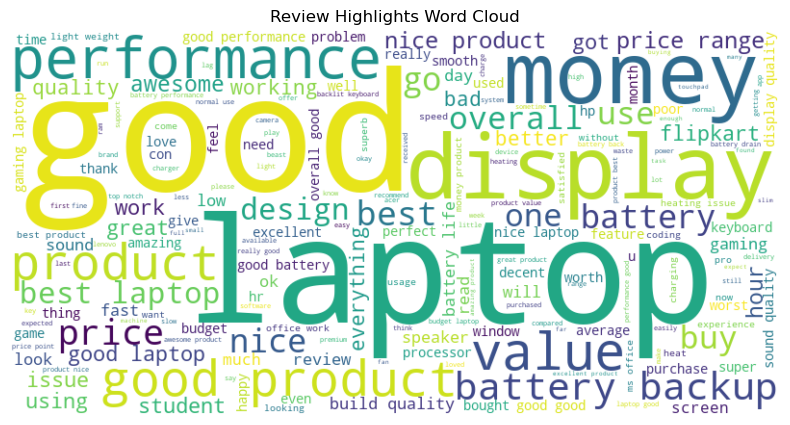

In [17]:
# Combine all review texts into a single string
all_reviews = ' '.join(df2['review'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Plotting the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Review Highlights Word Cloud')

# Save the word cloud as a PNG file
plt.savefig('review_highlights_word_cloud.png')

plt.show()


This clearly shows that the most words used and which are highly found in the data is __laptop__, followed by __good__, then __display__, eventually __perfomance__ and __money__. These might be considered later on during the data analysis when compared with models

___Extracting  and grouping by brands___

In [18]:
df=pd.DataFrame(uniquerows)

df['brand'] = df['product_name'].str.split().str[0]  # Extract the brand name from the product name
df['brand'] = df['brand'].str.replace(r'[^a-zA-Z]', '', regex=True)  # Remove any non-alphabetic characters from the brand name

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16977 entries, 0 to 16976
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_name    16977 non-null  object 
 1   overall_rating  16977 non-null  float64
 2   no_ratings      16977 non-null  int32  
 3   no_reviews      16977 non-null  int32  
 4   rating          16977 non-null  int64  
 5   title           16977 non-null  object 
 6   review          16977 non-null  object 
 7   brand           16977 non-null  object 
dtypes: float64(1), int32(2), int64(1), object(4)
memory usage: 928.6+ KB


Each brand was extracted from every single line of data, since they all have 16977 non-null objects.

In [19]:
df.head()

,product_name,overall_rating,no_ratings,no_reviews,rating,title,review,brand
0,apple macbook air apple m2 - (8 gb/256 gb ssd/...,4.7,15210,900,5,perfect product!,"loved it, it's my first macbook that i earned ...",apple
1,apple macbook air apple m2 - (8 gb/256 gb ssd/...,4.7,15210,900,5,fabulous!,battery lasted longer than my first relationsh...,apple
2,apple macbook air apple m2 - (8 gb/256 gb ssd/...,4.7,15210,900,5,fabulous!,such a great deal.. very happy with the perfor...,apple
3,apple macbook air apple m2 - (8 gb/256 gb ssd/...,4.7,15210,900,4,delightful,"awesome build quality and very good display, b...",apple
4,apple macbook air apple m2 - (8 gb/256 gb ssd/...,4.7,15210,900,5,awesome,when i ordered and came to know about seller r...,apple


This looks quite right.

___Deleting Title and Review columns___

The reason for this because during the analysis the title and review will not be considered.

In [20]:
del df['title'] # delete the title column
del df['review'] # delete the review column
df.info()# check the DataFrame info after deleting the columns
df.to_csv('archive/laptops_notitle_and_review.csv', index=False, encoding='utf-8') # save the cleaned DataFrame to a new CSV file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16977 entries, 0 to 16976
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_name    16977 non-null  object 
 1   overall_rating  16977 non-null  float64
 2   no_ratings      16977 non-null  int32  
 3   no_reviews      16977 non-null  int32  
 4   rating          16977 non-null  int64  
 5   brand           16977 non-null  object 
dtypes: float64(1), int32(2), int64(1), object(2)
memory usage: 663.3+ KB


The reason why this move was done is to make data analysis faster.  In fact we are working on the __df__ Dataframe.

___Extracting RAM and Storage from the product name___

+ _Extracting RAM by searching for the first GB value_
     
     Regex was used to capture the first occurence of digits followed by GB - case insensitive even though the change to lowercase had been done in the beginning of the data handling process.

+ _Extracting Storage by searching for the second GB or TB value_

    The reason for choosing TB since after a quick look at the product_name list one can see that there are some laptops which have a 1 TB of storage, so one needed to cater for both GB and TB.
    Regex was used:

        + \/ to match the separator in the product name.
        + .*? skips until the next storage value
        + (\d+) captures the  digits in storage size.
        + \s*(gb|tb) will capture GB or TB (case-insensitive)

Provided that no match is found NaN will be assigned.

The following was used since this approach tends to be cleaner and faster than looping through the rows manually as was the original idea.



In [21]:

extracted = df['product_name'].str.extract(r'(\d+)\s*gb.*?\/.*?(\d+)\s*(gb|tb)', flags=re.IGNORECASE)
df['ram_size'] = extracted[0] + ' GB'
df['storage_size'] = extracted[1] + ' ' + extracted[2].str.upper()
df.head()

,product_name,overall_rating,no_ratings,no_reviews,rating,brand,ram_size,storage_size
0,apple macbook air apple m2 - (8 gb/256 gb ssd/...,4.7,15210,900,5,apple,8 GB,256 GB
1,apple macbook air apple m2 - (8 gb/256 gb ssd/...,4.7,15210,900,5,apple,8 GB,256 GB
2,apple macbook air apple m2 - (8 gb/256 gb ssd/...,4.7,15210,900,5,apple,8 GB,256 GB
3,apple macbook air apple m2 - (8 gb/256 gb ssd/...,4.7,15210,900,4,apple,8 GB,256 GB
4,apple macbook air apple m2 - (8 gb/256 gb ssd/...,4.7,15210,900,5,apple,8 GB,256 GB


This looks good so far! Seems to be working perfectly !

___Extracting Storage Technology___

The type of storage technology may effect the performance of the laptop.
By Visually analysing the data the three main storage are:
+ __HDD__ which stands for Hard Disc Drive, which is a type of Magnetic Storage, with a  longevity of 3 to 5 years, due to its moving parts and which makes it the slowest type.
+ __eMMC__ which stands for Embedded MultiMediaCard which is faster than HDD, but slower and with less capacity than an SSD.  Usually found in phones or budget laptops.  The longevity is usually 4.75 years.
+ __SSD__ which stands for Solid State Drive, which is an Electronic Type of storage with a longevity of  10 years.  Being electronic it is much faster than the HDD.


In [22]:
df['storage_technology'] = df['product_name'].str.extract(r'(ssd|hdd|emmc)', expand = False)
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16977 entries, 0 to 16976
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_name        16977 non-null  object 
 1   overall_rating      16977 non-null  float64
 2   no_ratings          16977 non-null  int32  
 3   no_reviews          16977 non-null  int32  
 4   rating              16977 non-null  int64  
 5   brand               16977 non-null  object 
 6   ram_size            12222 non-null  object 
 7   storage_size        12222 non-null  object 
 8   storage_technology  8486 non-null   object 
dtypes: float64(1), int32(2), int64(1), object(5)
memory usage: 1.0+ MB


Here is where the problem actually starts.  __ram_size__ entries sum up to 12222 which is way different from brand and the actual numbers which ended up being 16977.  The same reasoning applies to the __storage_size__ which also amounts to 12222.

This requires visual analysis of the data, thus all the __product_name__ entries with the __ram_size__ value which is empty will be extracted to a new csv file.

In [23]:
null_values=df['ram_size'].isnull()
comparable_values = df.loc[null_values, 'product_name']
comparable_values.to_csv('archive/laptops_without_ram.csv', index=False, encoding='utf-8') # save the DataFrame with null values to a new CSV file
comparable_values.head()

273    samsung galaxy book4 metal intel core i3 13th ...
274    samsung galaxy book4 metal intel core i3 13th ...
275    samsung galaxy book4 metal intel core i3 13th ...
276    samsung galaxy book4 metal intel core i3 13th ...
277    samsung galaxy book4 metal intel core i3 13th ...
Name: product_name, dtype: object

When running the head command only partial __product_name__ was seen, thus the data was extracted to a csv file.  This was opened in Visual Studio Code but same value as the __comparable_value.head()__ was shown.  
As another checking this was opened with Microsoft Excel and when column was widened only partial product name was shown:

+ samsung galaxy book4 metal intel core i3 13th gen 1315u - (8 g...
+ samsung galaxy book4 metal intel core i3 13th gen 1315u - (8 g...
+ samsung galaxy book4 metal intel core i3 13th gen 1315u - (8 g...

So when checking for the first value before gb these were not catered for, and this is the reason why the non-null values for both __ram_size__ and __storage_size__ and for the drastic change for the __Storage_technology__.
All three should have 16977 non-null values but RAM and Storage Size both have 12222 non-null value, whereas the Storage Technology ended with only 8486 non-null values.

After checking this through,  the end result was that the data  does not have the whole product_name.  This was checked thouroughly even through colab, where a better GPU was used in order to run the same task using better parameters.  

This might be an issue with the file itself or during the extraction of the file.

This takes the exercise to a new turn and a presaved DataFrame will be used.


## Back to DF2 to do Visual Analysis

In [24]:
##checking df2
df2.head()

,product_name,overall_rating,no_ratings,no_reviews,rating,title,review
0,apple macbook air apple m2 - (8 gb/256 gb ssd/...,4.7,15210,900,5,perfect product!,"loved it, it's my first macbook that i earned ..."
1,apple macbook air apple m2 - (8 gb/256 gb ssd/...,4.7,15210,900,5,fabulous!,battery lasted longer than my first relationsh...
2,apple macbook air apple m2 - (8 gb/256 gb ssd/...,4.7,15210,900,5,fabulous!,such a great deal.. very happy with the perfor...
3,apple macbook air apple m2 - (8 gb/256 gb ssd/...,4.7,15210,900,4,delightful,"awesome build quality and very good display, b..."
4,apple macbook air apple m2 - (8 gb/256 gb ssd/...,4.7,15210,900,5,awesome,when i ordered and came to know about seller r...


___Organising the Data___

Here the reordering of the DataFrame is done.

In [25]:
# Extract the brand column from the product_name column if it doesn't already exist
if 'brand' not in df2.columns:
	df2['brand'] = df2['product_name'].str.split().str[0]  # Extract the brand name from the product name
	df2['brand'] = df2['brand'].str.replace(r'[^a-zA-Z]', '', regex=True)  # Remove any non-alphabetic characters

# Rearrange the columns
df2 = df2[['brand', 'product_name', 'no_ratings', 'overall_rating', 'no_reviews', 'rating', 'title', 'review']]  # re-arranging the columns
df2.head()

,brand,product_name,no_ratings,overall_rating,no_reviews,rating,title,review
0,apple,apple macbook air apple m2 - (8 gb/256 gb ssd/...,15210,4.7,900,5,perfect product!,"loved it, it's my first macbook that i earned ..."
1,apple,apple macbook air apple m2 - (8 gb/256 gb ssd/...,15210,4.7,900,5,fabulous!,battery lasted longer than my first relationsh...
2,apple,apple macbook air apple m2 - (8 gb/256 gb ssd/...,15210,4.7,900,5,fabulous!,such a great deal.. very happy with the perfor...
3,apple,apple macbook air apple m2 - (8 gb/256 gb ssd/...,15210,4.7,900,4,delightful,"awesome build quality and very good display, b..."
4,apple,apple macbook air apple m2 - (8 gb/256 gb ssd/...,15210,4.7,900,5,awesome,when i ordered and came to know about seller r...


___Average Rating by  Brand___

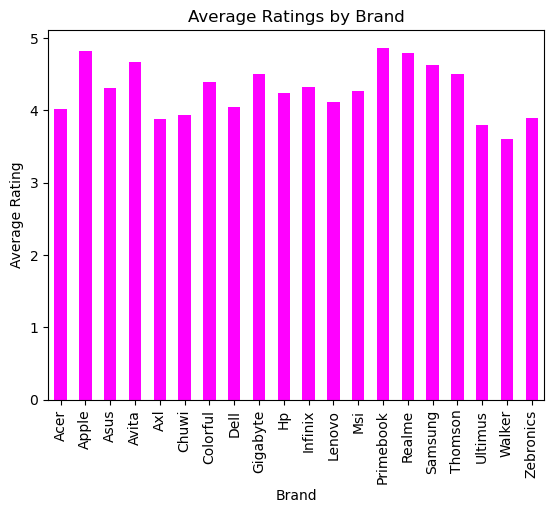

In [26]:
df2['brand'] = df2['brand'].str.title()  # Capitalize the first letter of each brand name
# Group by brand and calculate average rating
avg_ratings = df2.groupby('brand')['rating'].mean()

# Plotting
avg_ratings.plot(kind='bar', color='magenta')
plt.title('Average Ratings by Brand')
plt.xlabel('Brand')
plt.ylabel('Average Rating')
plt.show()


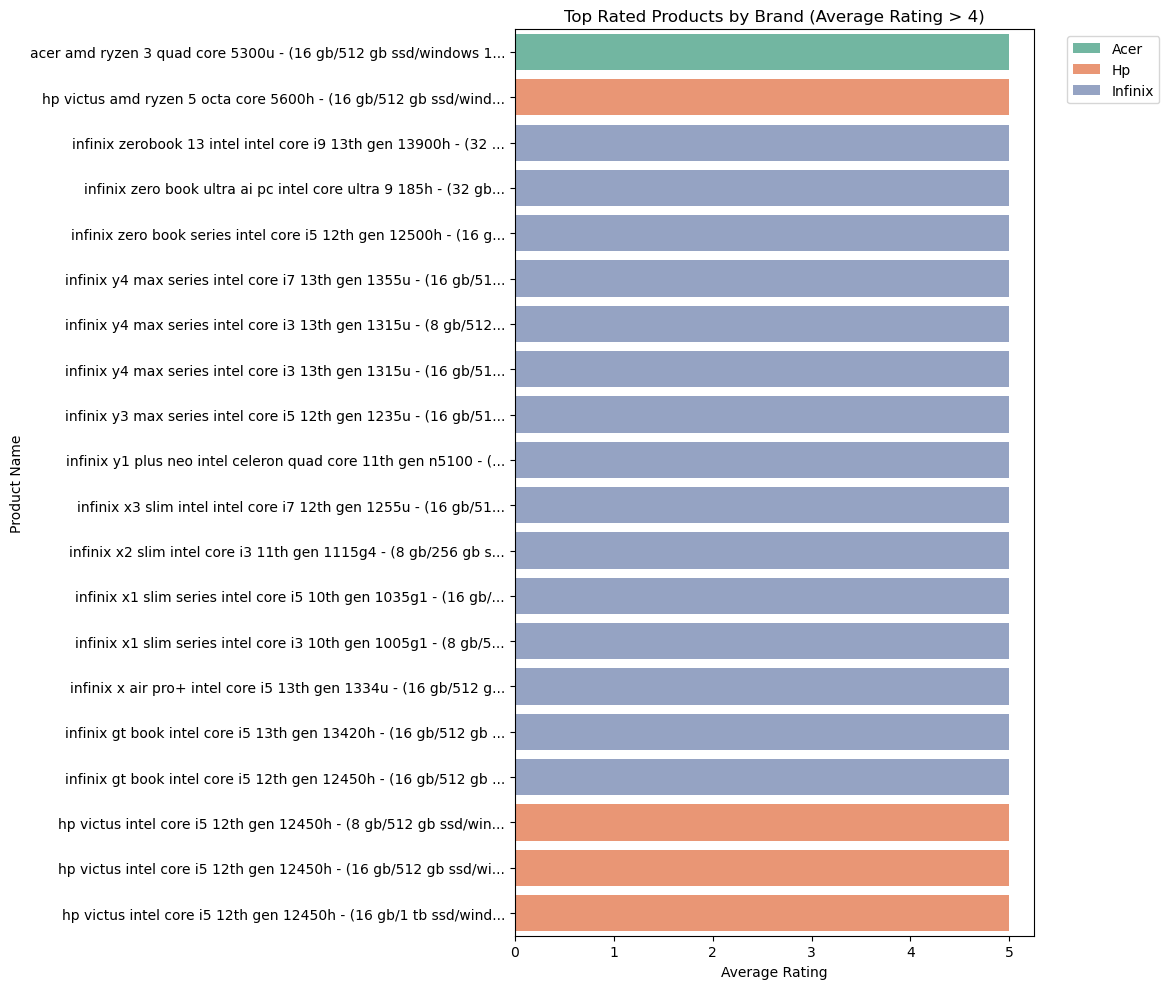

In [27]:
# Filter products with an average rating greater than 4
high_rated_brands = df2[df2['rating'] > 4]

# Group by both brand and product name
brand_product_ratings = high_rated_brands.groupby(['brand', 'product_name'])['rating'].mean().sort_values(ascending=False)

# Convert to DataFrame for plotting
rating_df = brand_product_ratings.reset_index()

# Plotting
plt.figure(figsize=(12, 10))
sns.barplot(data=rating_df.head(20),  # Show top 20 products
            y='product_name',
            x='rating',
            hue='brand',
            dodge=False,
            palette='Set2')

plt.title('Top Rated Products by Brand (Average Rating > 4)')
plt.xlabel('Average Rating')
plt.ylabel('Product Name')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [28]:
# Calculate average rating and review count by product
rating_df = (high_rated_brands.groupby(['brand', 'product_name'])
             .agg({'rating': 'mean', 'no_reviews': 'sum'})
             .reset_index())
            

# Sort by rating (descending) and then by number of reviews (descending)
sorted_df = rating_df.sort_values(['rating', 'no_reviews'], ascending=[False, False]).head(20)

# Create styled table with both metrics
styled_table = (sorted_df
                .style
                .format({'rating': '{:.2f}', 'no_reviews': '{:,}'})  # Format numbers
                .set_caption('Top Rated Products (Sorted by Rating & Review Count)')
                .set_properties(**{'text-align': 'left'})
                .background_gradient(cmap='Blues', subset=['rating'])
                .background_gradient(cmap='Greens', subset=['no_reviews'])
                .set_table_styles([
                    {'selector': 'th', 'props': [('font-weight', 'bold'), 
                                               ('background-color', '#f7f7f9')]}
                ]))
                
display(styled_table)


,brand,product_name,rating,no_reviews
60,Apple,apple macbook air apple m2 - (8 gb/256 gb ssd/mac os monterey)...,5.00,"302,400"
344,Realme,realme book (slim) intel core i3 11th gen 1115g4 - (8 gb/256 g...,5.00,"173,680"
149,Hp,hp 14s intel core i3 11th gen 1115g4 - (8 gb/512 gb ssd/window...,5.00,"125,928"
89,Asus,asus vivobook 15 intel core i3 12th gen 1215u - (8 gb/512 gb s...,5.00,"95,318"
80,Asus,asus tuf gaming f15 - ai powered gaming intel core i5 11th gen...,5.00,"93,912"
147,Hp,hp (15s-fq5007tu) intel core i3 12th gen 1215u - (8 gb/512 gb ...,5.00,"93,612"
88,Asus,asus vivobook 15 intel core i3 12th gen 1215u - (16 gb/512 gb ...,5.00,"92,136"
342,Primebook,primebook 4g android based mediatek mt8788 - (4 gb/64 gb emmc ...,5.00,"81,795"
187,Hp,hp chromebook mediatek mt8183 - (4 gb/32 gb emmc storage/chrom...,5.00,"80,360"
106,Asus,asus vivobook go 15 oled amd ryzen 3 quad core 7320u - (8 gb/5...,5.00,"78,880"


The fact that __apple macbook air apple m2 - (8 gb/256 gb ssd/mac os monterey)...__ is considered the best model with the largest amount of positive reviews as average this needs to be tested further.  

In fact the next step would be the plotting of the brand according to the  total  number of reviews.

__Sum of Reviews per brand__

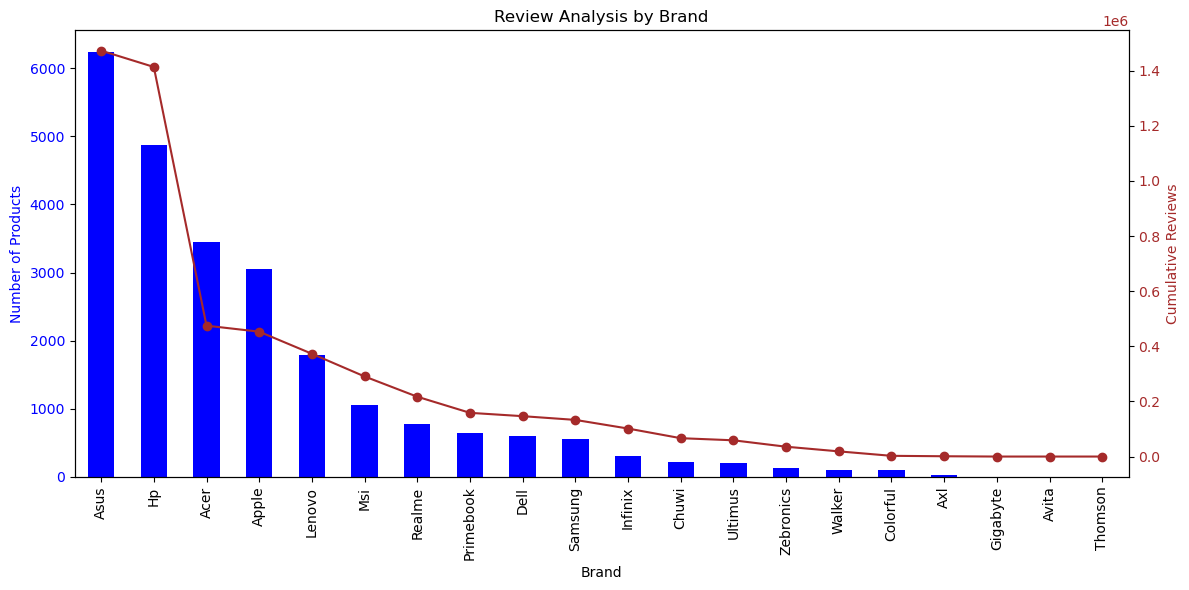

In [ ]:
# Convert brand names to sentence case
df2['brand'] = df2['brand'].str.title()

# Count the number of reviews for each brand
review_counts = df2['brand'].value_counts()
sum_reviews = df2['no_reviews'].sum()

# Calculate cumulative reviews by brand
cumulative_reviews = df2.groupby('brand')['no_reviews'].sum().sort_values(ascending=False)

# Create figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot product counts (bars)
review_counts.plot(kind='bar', color='blue', ax=ax1)
ax1.set_title('Review Analysis by Brand')
ax1.set_xlabel('Brand')
ax1.set_ylabel('Number of Product Entries', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plot cumulative reviews (line)
ax2 = ax1.twinx()
cumulative_reviews.plot(kind='line', color='brown', marker='o', ax=ax2)
ax2.set_ylabel('Cumulative Reviews', color='brown')
ax2.tick_params(axis='y', labelcolor='brown')

plt.tight_layout()
plt.show()


This shows that the Apple has 3000 reviews  total reviews.  So it must be that there aren't that many models to test.

Besides as a company with the largest amount of products  will be as follows:
1. Asus
2. HP
3. Acer

__Apple  products__

After the above analysis a query on how many products are actually being reviewed we  end up having:

In [30]:
# Comprehensive Realme model analysis
apple_stats = df2[df2['brand'].str.title() == 'Apple'].groupby('product_name').agg({
    'rating': 'mean',
    'no_reviews': 'sum'
}).sort_values('no_reviews', ascending=False)

print(f"Found {len(apple_stats)} Apple models")
display(apple_stats.style
        .format({'rating': '{:.2f}', 'no_reviews': '{:,}'})
        .background_gradient(subset=['rating'], cmap='YlGn')
        .background_gradient(subset=['no_reviews'], cmap='Blues'))


Found 3 Apple models


,rating,no_reviews
product_name,,
apple macbook air apple m2 - (8 gb/256 gb ssd/mac os monterey)...,4.82,"360,000"
apple macbook air apple m2 - (8 gb/512 gb ssd/mac os monterey)...,4.82,"90,000"
apple macbook air apple m3 - (8 gb/256 gb ssd/macos sonoma) mr...,4.84,"3,072"


__RealMe products__

After the above analysis a query on how many products are actually being reviewed we  end up having:

In [31]:
# Comprehensive Realme model analysis
realme_stats = df2[df2['brand'].str.title() == 'Realme'].groupby('product_name').agg({
    'rating': 'mean',
    'no_reviews': 'sum'
}).sort_values('no_reviews', ascending=False)

print(f"Found {len(realme_stats)} Realme models")
display(realme_stats.style
        .format({'rating': '{:.2f}', 'no_reviews': '{:,}'})
        .background_gradient(subset=['rating'], cmap='YlGn')
        .background_gradient(subset=['no_reviews'], cmap='Blues'))


Found 1 Realme models


,rating,no_reviews
product_name,,
realme book (slim) intel core i3 11th gen 1115g4 - (8 gb/256 g...,4.79,"217,100"


__Checking Hp Models__

Now it is the time to check for HP models since they are the mostly mentioned as a brand:

In [32]:
print(len(df2))

24113


In [33]:
# Comprehensive HP model analysis
# Filter rows where the brand is 'hp'
hp_stats = df2.loc[df2['brand'].str.lower() == 'hp'].groupby('product_name').agg({
    'rating': 'mean',
    'no_reviews': 'sum'
}).sort_values('no_reviews', ascending=False)

print(f"Found {len(hp_stats)} HP models")
display(hp_stats.style
        .format({'rating': '{:.2f}', 'no_reviews': '{:,}'})
        .background_gradient(subset=['rating'], cmap='YlGn')
        .background_gradient(subset=['no_reviews'], cmap='Blues'))

Found 86 HP models


,rating,no_reviews
product_name,,
hp 14s intel core i3 11th gen 1115g4 - (8 gb/512 gb ssd/window...,4.62,"190,800"
hp (15s-fq5007tu) intel core i3 12th gen 1215u - (8 gb/512 gb ...,4.45,"153,868"
hp chromebook mediatek mt8183 - (4 gb/32 gb emmc storage/chrom...,4.57,"114,800"
hp 15s intel core i3 12th gen 1215u - (8 gb/512 gb ssd/windows...,4.37,"112,234"
hp backlit intel core i5 12th gen 1235u - (8 gb/512 gb ssd/win...,4.15,"89,760"
hp laptop intel core i3 12th gen 1215u - (8 gb/256 gb ssd/wind...,4.27,"70,600"
hp amd ryzen 5 hexa core 5500u - (16 gb/512 gb ssd/windows 11 ...,4.35,"47,600"
hp 15s amd ryzen 3 quad core 5300u - (8 gb/512 gb ssd/windows ...,4.38,"45,500"
hp amd ryzen 3 dual core 3250u - (8 gb/512 gb ssd/windows 11 h...,4.68,"41,000"


__Rating Distribution by Brand__

<Figure size 1000x600 with 0 Axes>

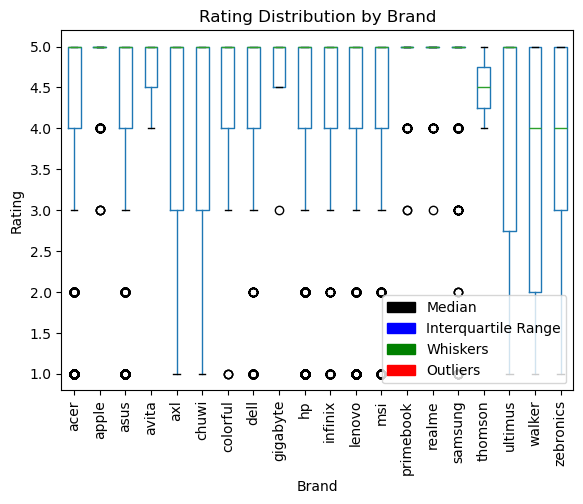

In [34]:


# Plotting
plt.figure(figsize=(10, 6))
df.boxplot(column='rating', by='brand', grid=False)  # Use lowercase 'brand' and 'rating'
plt.title('Rating Distribution by Brand')
plt.suptitle('')  # Suppress the default title
plt.xlabel('Brand')
plt.ylabel('Rating')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability

# Create legend
median_patch = mpatches.Patch(color='black', label='Median')
iqr_patch = mpatches.Patch(color='blue', label='Interquartile Range')
whisker_patch = mpatches.Patch(color='green', label='Whiskers')
outlier_patch = mpatches.Patch(color='red', label='Outliers')

plt.legend(handles=[median_patch, iqr_patch, whisker_patch, outlier_patch], loc='best')

plt.show()


The box shows us the ratings that most people gave to the laptops.  The bottom of the box tells the lowest rating that many people thought was ok.  The top of the box shows the highest rating that the people gave.  
Apple, Primebook, Realme and Samsung seem to have the higher ratings of all, but Samsung has the circles which suggest different options.  Apple the different option lies on 3, which makes it preferred and is comparable to Primebook and Realme.  But on the other hand, all three are reviewed much less when compared to  HP, Acer, Asus, etc.

__Pie Charts__

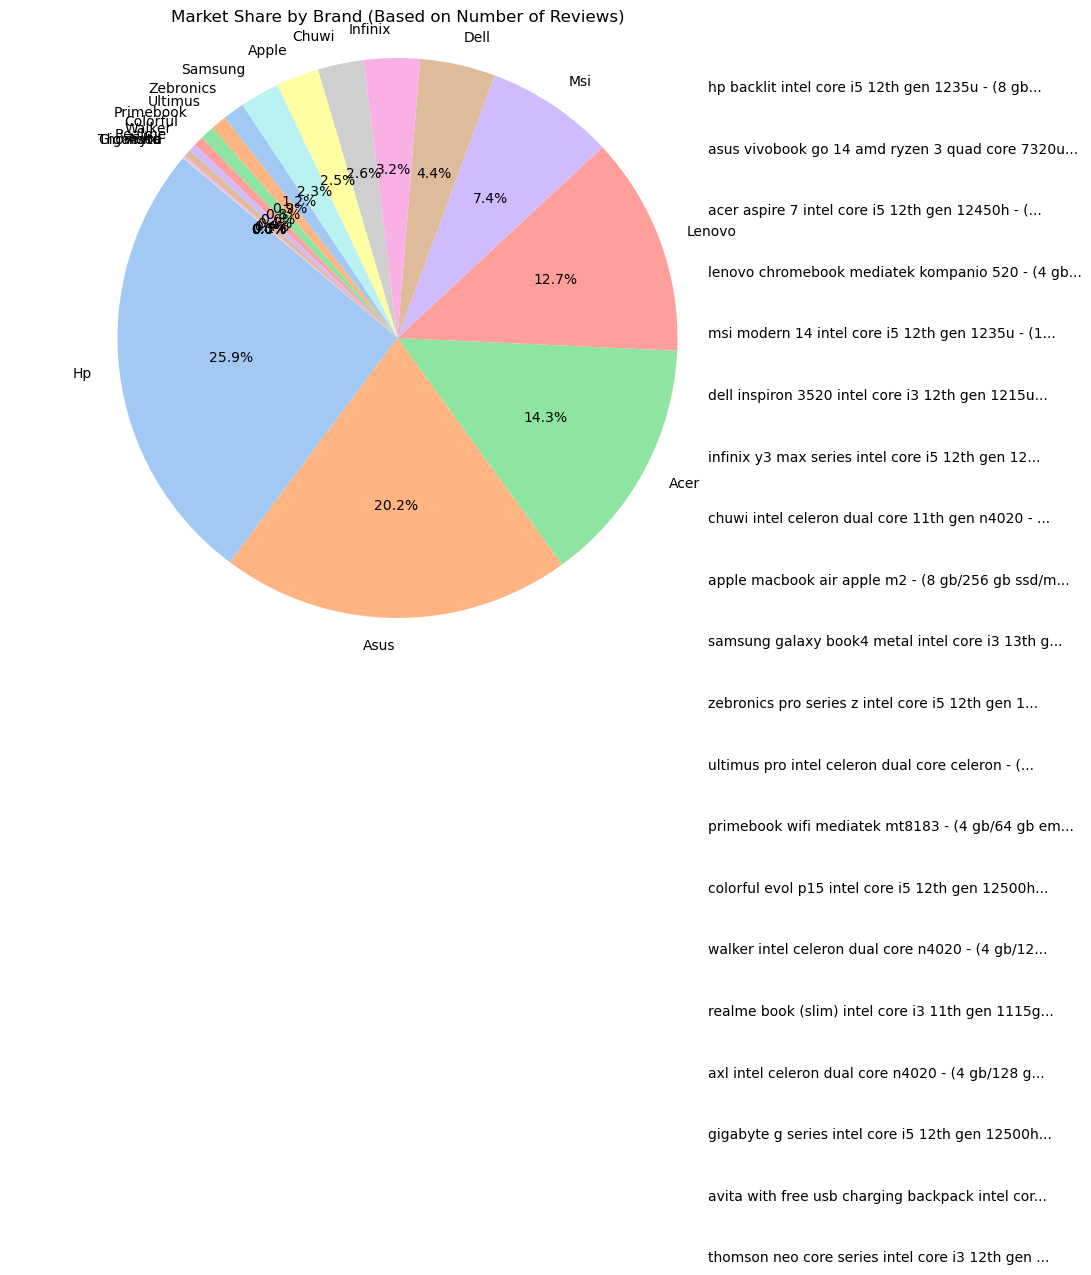

In [36]:

# Convert brand names to sentence case
df2['brand'] = df2['brand'].str.title()

# Count the number of reviews for each brand
review_counts = df2['brand'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(review_counts, labels=review_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Market Share by Brand (Based on Number of Reviews)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Annotate with models tested for each brand
for i, brand in enumerate(review_counts.index):
	models = df2[df2['brand'] == brand]['product_name'].unique()
	models_str = ', '.join(models)
	if len(models_str) > 50:
		models_str = models_str[:47] + '...'
	plt.annotate(models_str, xy=(0.9, 0.9 - i*0.1), xycoords='axes fraction', fontsize=10, color='black')

# Save the pie chart as a PNG file
plt.savefig('market_share_by_brand_with_models.png')

plt.show()


__Scatter Plot__

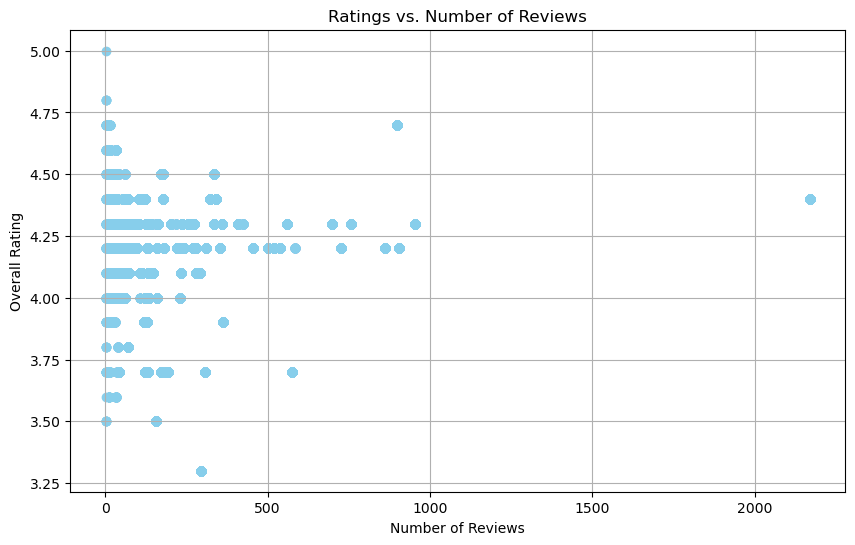

In [37]:
# Plotting the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df2['no_reviews'], df2['overall_rating'], color='skyblue')
plt.title('Ratings vs. Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Overall Rating')
plt.grid(True)

# Save the scatter plot as a PNG file
plt.savefig('ratings_vs_reviews_scatter_plot.png')

plt.show()


__Histogram__

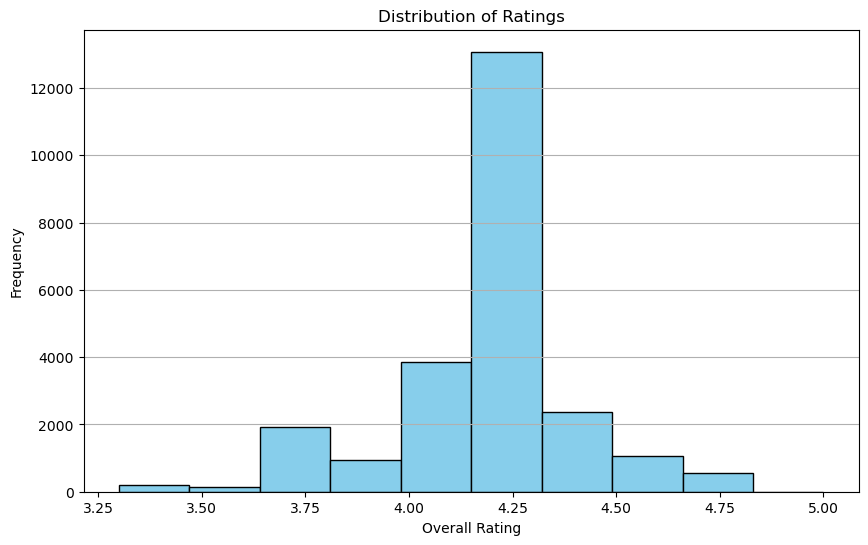

In [38]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df2['overall_rating'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Overall Rating')
plt.ylabel('Frequency')
plt.grid(axis='y')

# Save the histogram as a PNG file
plt.savefig('distribution_of_ratings_histogram.png')

plt.show()


Stacks

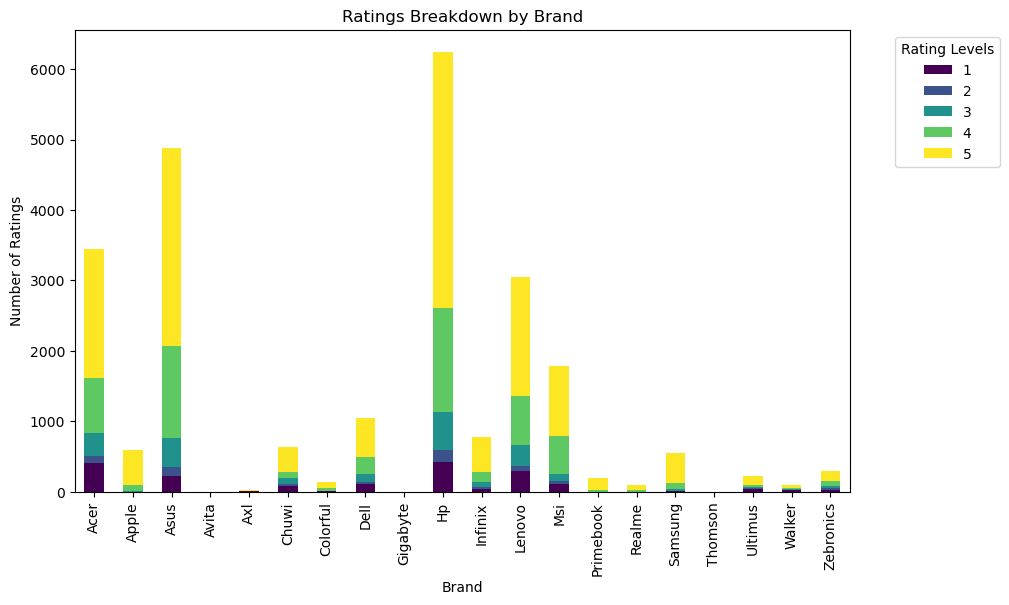

In [39]:
# Create a pivot table to count the number of each rating for each brand
pivot_table = df2.pivot_table(index='brand', columns='rating', aggfunc='size', fill_value=0)

# Plotting the stacked bar chart
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')
plt.title('Ratings Breakdown by Brand')
plt.xlabel('Brand')
plt.ylabel('Number of Ratings')
plt.legend(title='Rating Levels', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the stacked bar chart as a PNG file
plt.savefig('ratings_breakdown_by_brand.png')

plt.show()


In [40]:
from sklearn.model_selection import train_test_split

# Example for predictive modeling:

X = df2.drop(columns=['rating'])  # Features
y = df2['rating']                 # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

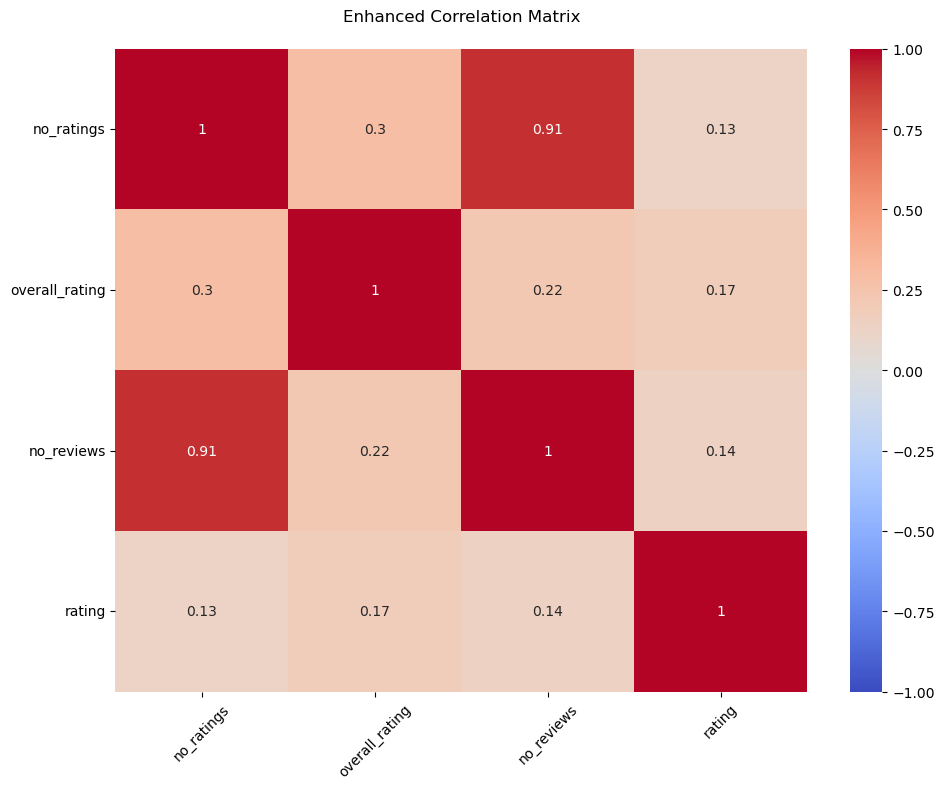

In [41]:
# Select only numeric columns from df2
numeric_columns = df2.select_dtypes(include=['float64', 'int64', 'int32'])

# Compute the correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title("Enhanced Correlation Matrix", pad=20)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

This suggests that there is a high correlation with the __Number of ratings__ with the __Number of reviews__.  The more there are reviews the more the ratings are which make sense.

On the other hand, the higher the __no_reviews__ (Number of reviews), the lower the __rating__ is going to be.
The same applies to the __no_ratings__ the higher the ratings the lowerer the __overall_rating__ will be.

sklearn version: 1.5.1


c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


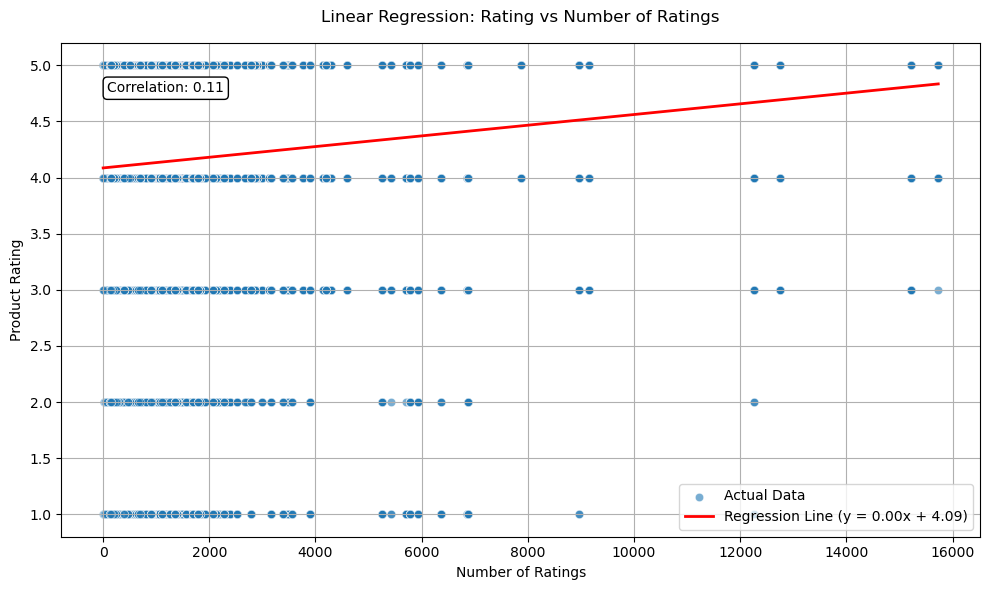

In [42]:
import sklearn
from sklearn.linear_model import LinearRegression
print("sklearn version:", sklearn.__version__)


X = df2[['no_ratings']]  # Independent variable (reshape to 2D array)
y = df2['rating']         # Dependent variable

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Get predictions for the line
x_range = np.linspace(X.min(), X.max(), 100)
y_pred = model.predict(x_range.reshape(-1, 1))

# Create regression plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['no_ratings'], y=y, alpha=0.6, label='Actual Data')
plt.plot(x_range, y_pred, color='red', linewidth=2, label=f'Regression Line (y = {model.coef_[0]:.2f}x + {model.intercept_:.2f})')

# Add labels and title
plt.title('Linear Regression: Rating vs Number of Ratings', pad=15)
plt.xlabel('Number of Ratings')
plt.ylabel('Product Rating')
plt.legend()
plt.grid(True)

# Annotate with correlation value
corr_value = df[['no_ratings', 'rating']].corr().iloc[0,1]
plt.annotate(f'Correlation: {corr_value:.2f}', 
             xy=(0.05, 0.9), xycoords='axes fraction',
             bbox=dict(boxstyle='round', fc='white'))

plt.tight_layout()
plt.show()


# Conclusion

The larger the number of ratings the higher the rating is going to be.

Data Type can affect maximum  length, and apart from that even the amount of  Memory  available on your system will ultimately limit how much data you can store in a DataFrame.  Large strings in many rows can consume significat memory.

Performance - very large strings can impact the performance of operations on the dataFrame such as sorting, filtering and aggregating.

This dataset was updated 2 months ago, which makes it very recent, thus the data should be accurate.  But when it comes to laptop analysis there are lots of factors which need to be taken care of.
+ Review depends on the person's necessity - a review does not solely determine the best laptop.
In terms of organisation, this dataset is preferred:
https://www.kaggle.com/datasets/bhavikjikadara/brand-laptops-dataset

Where it actually identifies all components seperately and also includes the rating.
The only drawback with this dataset is that it has been updated a year ago and there is no expected update frequency.  This does not make it that reliable.